In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv("data/WhatsgoodlyData-6.csv")
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [64]:
df1=df.drop("Question", axis=1)

<AxesSubplot: xlabel='Answer', ylabel='Count'>

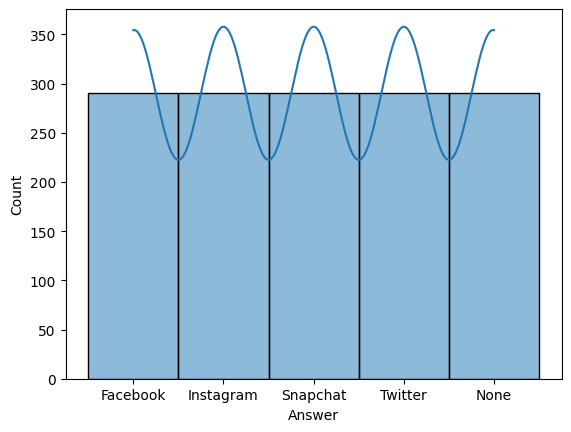

In [65]:
sns.histplot(x='Answer', data=df1, kde=True)

<AxesSubplot: xlabel='Answer', ylabel='Count'>

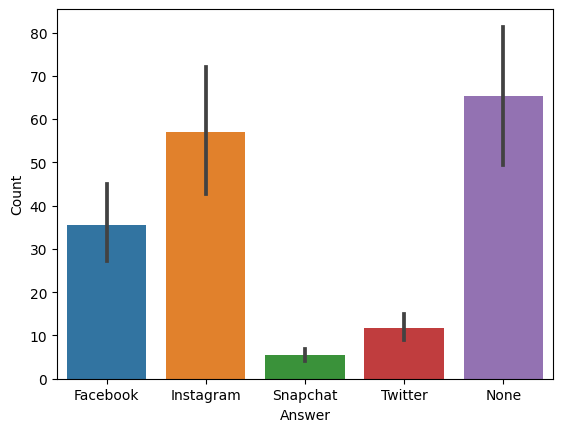

In [66]:
sns.barplot(x='Answer', y='Count', data=df1)

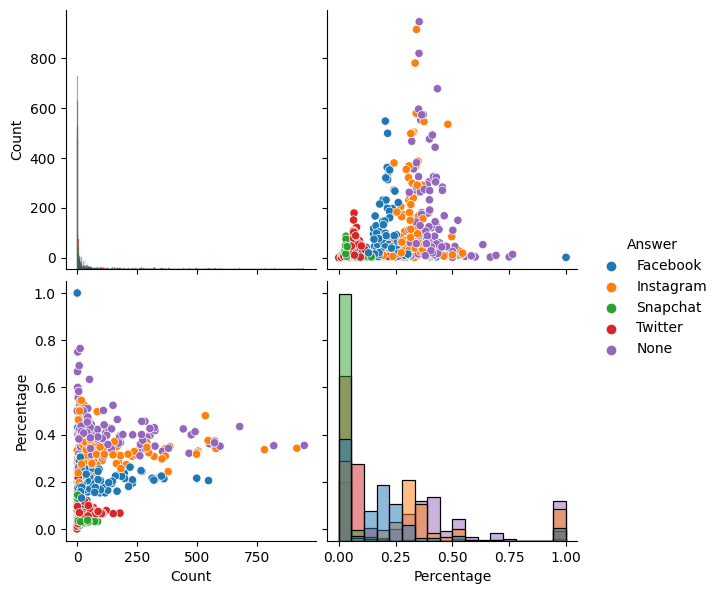

In [67]:
sns.pairplot(df1, hue="Answer", height=3, diag_kind="hist")

<AxesSubplot: xlabel='Segment Type', ylabel='Count'>

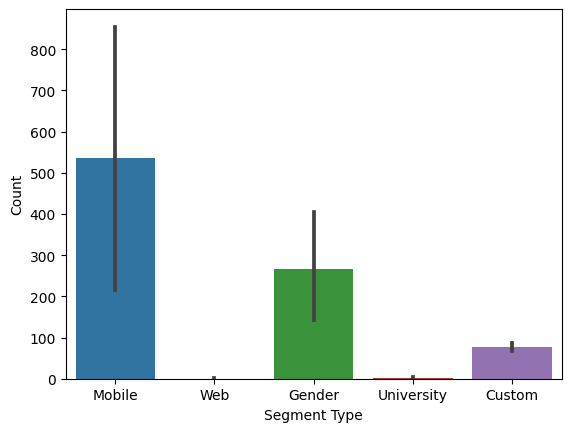

In [68]:
sns.barplot(x='Segment Type', y='Count', data=df1)

In [69]:
df1.isnull().sum()

Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [70]:
df1.dtypes

Segment Type            object
Segment Description     object
Answer                  object
Count                    int64
Percentage             float64
dtype: object

In [71]:
df1["Segment Type"]=df1['Segment Type'].astype('category')
df1[:5]

,Segment Type,Segment Description,Answer,Count,Percentage
0,Mobile,Global results,Facebook,548,0.205
1,Mobile,Global results,Instagram,916,0.342
2,Mobile,Global results,Snapchat,86,0.032
3,Mobile,Global results,Twitter,179,0.067
4,Mobile,Global results,None,947,0.354


In [72]:
le = LabelEncoder()

label = le.fit_transform(df1['Segment Type'])

label

array([2, 2, 2, ..., 0, 0, 0])

In [73]:
df1.drop("Segment Type", axis=1, inplace=True)

df1['Segment Type_num'] = label

df1

,Segment Description,Answer,Count,Percentage,Segment Type_num
0,Global results,Facebook,548,0.205,2
1,Global results,Instagram,916,0.342,2
2,Global results,Snapchat,86,0.032,2
3,Global results,Twitter,179,0.067,2
4,Global results,None,947,0.354,2
...,...,...,...,...,...
1445,Sexual orientation? Straight,Facebook,215,0.180,0
1446,Sexual orientation? Straight,Instagram,354,0.297,0
1447,Sexual orientation? Straight,Snapchat,44,0.037,0
1448,Sexual orientation? Straight,Twitter,88,0.074,0


In [74]:
le2 = LabelEncoder()

label2 = le2.fit_transform(df1['Segment Description'])

label2

array([ 50,  50,  50, ..., 112, 112, 112])

In [75]:
df1.drop("Segment Description", axis=1, inplace=True)

df1["Segment Description_num"] = label2
 

df1

,Answer,Count,Percentage,Segment Type_num,Segment Description_num
0,Facebook,548,0.205,2,50
1,Instagram,916,0.342,2,50
2,Snapchat,86,0.032,2,50
3,Twitter,179,0.067,2,50
4,None,947,0.354,2,50
...,...,...,...,...,...
1445,Facebook,215,0.180,0,112
1446,Instagram,354,0.297,0,112
1447,Snapchat,44,0.037,0,112
1448,Twitter,88,0.074,0,112


In [76]:
le3 = LabelEncoder()

label3 = le3.fit_transform(df1['Answer'])

label3

array([0, 1, 3, ..., 3, 4, 2])

In [77]:
df1.drop('Answer', axis=1, inplace=True)

df1['Answer_num'] = label3

df1


,Count,Percentage,Segment Type_num,Segment Description_num,Answer_num
0,548,0.205,2,50,0
1,916,0.342,2,50,1
2,86,0.032,2,50,3
3,179,0.067,2,50,4
4,947,0.354,2,50,2
...,...,...,...,...,...
1445,215,0.180,0,112,0
1446,354,0.297,0,112,1
1447,44,0.037,0,112,3
1448,88,0.074,0,112,4


In [78]:
new_cols = ["Segment Type_num", "Segment Description_num", "Answer_num", "Percentage", 'Count']

df1=df1.reindex(columns=new_cols)
print(df1)

      Segment Type_num  Segment Description_num  Answer_num  Percentage  Count
0                    2                       50           0       0.205    548
1                    2                       50           1       0.342    916
2                    2                       50           3       0.032     86
3                    2                       50           4       0.067    179
4                    2                       50           2       0.354    947
...                ...                      ...         ...         ...    ...
1445                 0                      112           0       0.180    215
1446                 0                      112           1       0.297    354
1447                 0                      112           3       0.037     44
1448                 0                      112           4       0.074     88
1449                 0                      112           2       0.412    492

[1450 rows x 5 columns]


In [79]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1:]
X,y

(      Segment Type_num  Segment Description_num  Answer_num  Percentage
 0                    2                       50           0       0.205
 1                    2                       50           1       0.342
 2                    2                       50           3       0.032
 3                    2                       50           4       0.067
 4                    2                       50           2       0.354
 ...                ...                      ...         ...         ...
 1445                 0                      112           0       0.180
 1446                 0                      112           1       0.297
 1447                 0                      112           3       0.037
 1448                 0                      112           4       0.074
 1449                 0                      112           2       0.412
 
 [1450 rows x 4 columns],
       Count
 0       548
 1       916
 2        86
 3       179
 4       947
 ...     ...
 1445

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [85]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state = 42)

reg.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [86]:
from sklearn.metrics import mean_squared_error

In [88]:
accuracy_train = reg.score(X_train, y_train)

accuracy_test = reg.score(X_test, y_test)

print(accuracy_train, accuracy_test)

1.0 1.0


In [89]:
y_pred = reg.predict([X.loc[1]])

y_pred

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([916.])